Brendan Bruce

ECE 573: HW1

Due Date: 2/19/2019

# Question 1 and 5: 3 Sum Algorithms

Q1.   We discussed two versions of the 3-sum problem: A "naive" implementation (O(N^3)) and a "sophisticated" implementation (O(N^2 lg N)). Implement these algorithms.  Your implementation should be able to read data in from regular data/text file with each entry on a separate line.  Using Data provided here, determine the run time cost of your implementations as function of input data size.  Plot and analyze (discuss) your data.  

Q5.  Faster-est-ist 3-sum: Develop an implementation that uses a linear algorithm to count the number of pairs that sum to zero after the array is sorted (instead of the binary-search based linearithmic algorithm). Use the ideas to develop a quadratic algorithm for the 3-sum problem.

## Problem Background

The 3 sum problem for our purposes is defined as follows: Given N distinct integers, how many triples sum to exactly zero?

With this problem statement, we view three approaches for solving the 3 sum problem.

**Solution 1: The brute-force algorithm**

Here we iterate over all triples in the array and check each one to see if it sums to 0.


I will show that this results in a O(N^3) complexity.

**Solution 2: Binary search based algorithm**

Here we first sort the array, then iterate over all pairs in the array and perform a binary search for each one to see if there is a 3rd element that makes a triple sum of 0. 

I will show that this results in a O(NlogN + N^2 logN) = O(N^2 logN) complexity

**Solution 3: 2 Sum based 3 Sum algorithm**

This is the algorithm implemented for Q5 and is the fastest, and most complex of the 3 algorithms. I have given a loose walkthrough of the algorithm below.

Algorithm Idea:

1. Given a sorted array as input

2. We start with an O(n) algorithm that counts the number of pairs that sum to zero.

3. We can then extend this to an O(n) algorithm that counts the number of pairs that sum to a desired number.

4. We then can access each element of the array and run the above algorithm as the desired number and count the number of pairs for each one. With some additional checks to ensure we are not double counting then we should be able to count the total number of 3sums to 0 through N function calls to the O(N) algorithm giving us the overall complexity of O(NlogN + N^2) = O(N^2) (I will show this result experimentally)

Linear pairs summing to target algorithm pseudocode as mentioned in 2:

1. Set left index to the beginning of the array

2. Set right index to the end of the array

3. While the left index is less than the right index

    1. if the sum of the left and right values is the target then we increment the count and increment the left index

    2. else if the sum of the left and right values is less than the target then we move closer to the target by incrementing the left index

    3. else we move closer to the target by decrementing the right index

4. return count

We then modify the above algorithm to only increment the count if the left is less than the right is less than the value of the array element we are accessing

Fastest 3sum using linear pairs:

1. Sort the array

2. Iterate through the array and add the return value of the (modified) linear pair algorithm when it is given the (negative) value of the current array element

3. return count


## Complexity Analysis

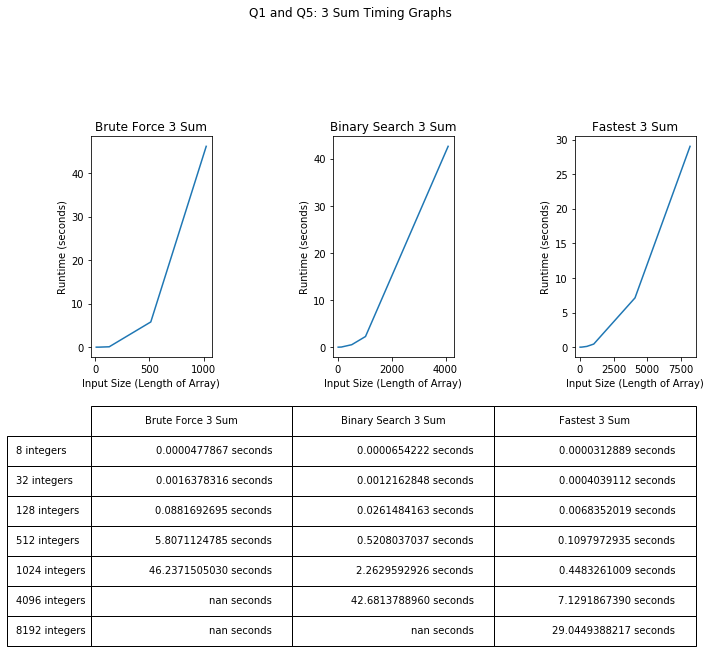

In [1]:
%matplotlib inline
from timing_experiments import *

three_sum_timing()

For the Brute Force 3 Sum algorithm, the 4096 and 8192 integer arrays took too long to finish. For the Binary Search 3 Sum algorithm, the 8192 integer array took too long to finish.

Looking at the runtimes for the three algorithms, we can see that if we were to guess the order the complexity of the algorithms, we would guess Brute Force > Binary Search > Fastest. Based on our earlier analysis of the algorithms, this mirrors our suspicions ( n^3 > n^2 logn > n^2 )

We can't use the doubling hypothesis for Binary Search 3 sum because the doubling hypothesis can't determine logarithmic factors. However, we can still use it to look to try finding a constant for both of the other 2.

(If running the notebook in the future the values may be different, next assignment will use better methodology to correct this)

In [7]:
import math
print("Brute force")
run_time = [5.8, 46.23]

for prev, curr in zip(run_time[:-1:], run_time[1::]):
    print(math.log(curr/prev, 2))
    
print("Binary search")
run_time = [.52, 2.26]

for prev, curr in zip(run_time[:-1:], run_time[1::]):
    print(math.log(curr/prev, 2))    
    
print("Fastest")
run_time = [7.12, 29.04]

for prev, curr in zip(run_time[:-1:], run_time[1::]):
    print(math.log(curr/prev, 2))

Brute force
2.994704557221007
Binary search
2.1197392442740957
Fastest
2.028092307029353


This result matches our previous analysis. To further analyze Binary Search 3 Sum we are going to use the fact that the constant value lies between the other two and the graph appears to grow somewhere between n^3 and n^2. With this we can make a qualitative guess that the algorithm is O(n^2logn)

## Best-Average-Worst Cases

1. Brute Force: How it is currently implemented, it will iterate through the 3 loops completely regardless of the input data. Therefore, the Best, Average and Worst cases are the same

2. Binary Search: With the dataset used for the experimentation we will always have to go through the full log N binary search. Why? Because the input data has no negative numbers! We cannot find any 3 sums to 0 when there are no negative numbers which means our binary search will have to complete and return False each time. The Best case for this algorithm would be to always find the 3rd entry on the first search (unrealistic) which would give us O(n^2) performance. The average case is the going to be based on the average case of the binary search algorithm which is also O(nlogn)

3. Fastest: Similar to the Brute Force algorithm, the loops will always complete regardless of the input data. Therefore, the Best, Average and Worst cases are the same

# Question 2: Union Find Algorithms

Q2. We discussed the Union-Find algorithm in class. Implement the three versions: (i) Quick Find, (ii) Quick Union, and (iii) Quick Union with Weight Balancing. Using Data provided here determine the run time cost of your implementation (as a function of input data size). Plot and analyze your data. 


Note:  The maximum value of a point label is 8192 for all the different input data set. This implies there could in principle be approximately 8192 x 8192 connections.  Each line of the input data set contains an integer pair (p, q) which implies that p is connected to q.  Recall: UF algorithm should

 
// read in a sequence of pairs of integers (each in the range 1 to N) where N=8192

 
// calling find() for each pair: If the members of the pair are not already connected

 
// call union() and print the pair.

## Problem Background

The Union Find problem for our purposes is defined as follows: Given a list of pairs of nodes and a graph, either find if the 2 nodes are connected in the graph or union to connect the nodes. 

With this problem statement, we view two approaches and an optimization to the second approach.

**Solution 1: Quick Find algorithm**

The quick find approach is to make the find operation fast. For this approach it requires a single comparison to find if two nodes are connected (O(1)). The downside to this approach is that it makes the union more complicated. The union algorithm is O(n), having to perform comparisons for every array element.

**Solution 2a: Quick Union algorithm**

The quick union approach is to make the union operation fast, instead of the find operation being fast. We add an additional helper function that helps us follow the nodes in the graph to find the node's root. This operation is best case O(1), worst case O(n) and average case of whatever the average height of the node trees are. With this operation, the find and the union operation becomes 2 root calls and 1 assignment for a best case O(1), worst case O(n) operation. The average case is hard to determine because it depends on the height of the trees. However, with no way of controlling the height of the tree we know the algorithm will eventually have issues due to the heights of the trees. That is where the next solution improves upon.

**Solution 2b: Balanced Quick Union algorithm**

The balanced quick union uses the same concept as the quick union with an additional tree height tracking method. This allows for the union operations to connect nodes in a way that minimizes the heights of the trees. With this improvement, the height of any tree will be at most log n, meaning the root operation becomes a O(log n) op. This changes our union and find complexities to be O(log n) instead of O(n) in the worst case.


## Complexity Analysis

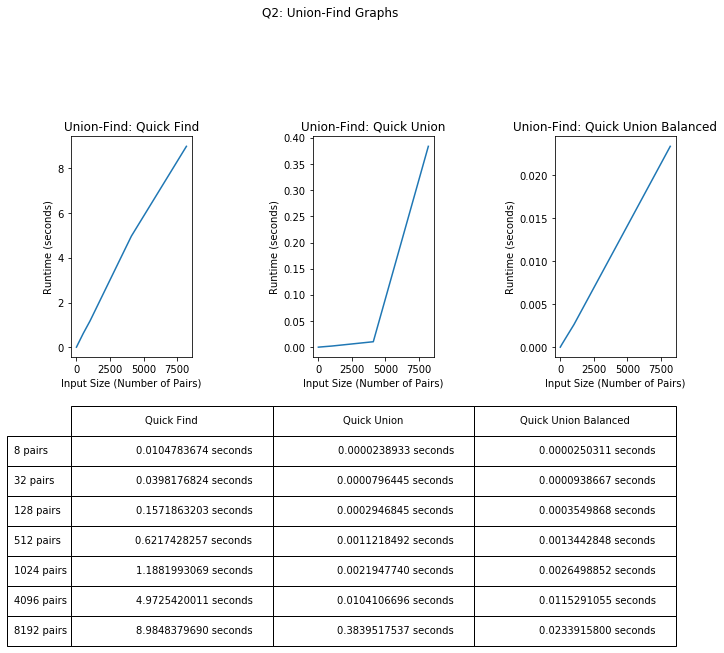

In [3]:
union_find_timing()

Each algorithm is given a list of pairs to work through. This makes the complexity measurement a bit different. The earlier entries in the list are essentially prefactors while the graph is being populated. What we are looking at is something like O(1+2+3+4+...+N) for quick find. This still ends up being O(N) due to properties of Big Oh notation.

1. Quick Find
Quick Find is expected to be an O(N) operation which is what we can see in the above graph.
2. Quick Union
The Quick Union operation depends on the heights of the trees in the graph. We know that as more node pairs enter the graph, the less balanced the trees will become. What we see in the above graph is that up to 4096 pairs the performance grows very slowly then at 8192 pairs it starts to grow a lot faster. I believe this is due to the differences in the Worst/Best/Average case complexities.
3. Quick Union Balanced
The modification to make the Quick Union algorithm keep the tree heights balanced has the nice property of making the Worst/Best/Average case performances all the same at O(logn). The plot doesn't show the O(logn) performance and I think more data points would be needed to see the effects of keeping the trees balanced

# Question 4: Farthest Pair

Q4: Farthest Pair (1 Dimension): Write a program that, given an array a[] of N double values, find a farthest pair: two values whose difference is no smaller than the difference of any other pair (in absolute value). The running time of the program should be LINEAR IN THE WORST CASE.

## Problem Background

My interpretation of this problem is that we would like to create a linear algorithm to find the two numbers that when subtracted yield the largest magnitude.


**Algorithm:**

1. Iterate through all elements in the array
    1. Check if the current element is less than the stored element
        1. If it is then set the stored element to be equal to the current
    2. Check if the current element is more than the stored element
        1. If it is then set the stored element to be equal to the current
2. Print the values of the minimum and maximum elements and their difference

This algorithm will perform 2 compares for every element of the array giving what should be a O(n) complexity


## Complexity Analysis

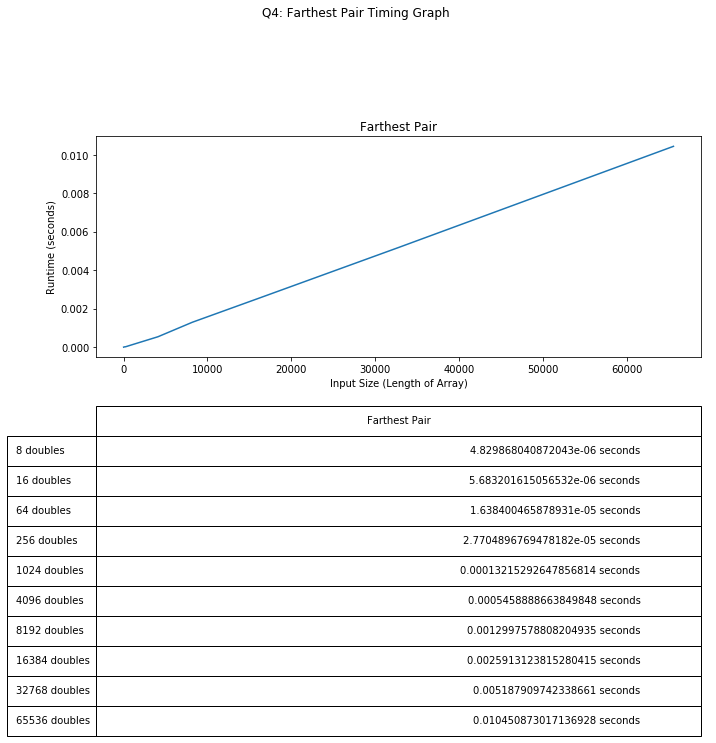

In [4]:
farthest_pair_timing()

With the timing data seen above, it is pretty clear that the runtime grows linearly with the input size. Let's use the doubling hypothesis to confirm: 

The datapoints we will use here are 4096, 8192, 16384, 32768, 65536 and their corresponding runtimes (If running the notebook in the future the values may be different, next assignment will use better methodology to correct this)

In [1]:
import math

run_time = [.000545, .001299, .00259, .00518, .0104]

for prev, curr in zip(run_time[:-1:], run_time[1::]):
    print(math.log(curr/prev, 2))

1.2530732957835924
0.9955506671260352
1.0
1.0055595253419007


The doubling hypothesis on the values gives values that approach 1 as the input size gets larger, confirming that our algorithm is O(n)

## Best-Average-Worst Case

The algorithm will always iterate through the array once so the Best, Average and Worst cases are the same at O(n)

# Question 3: Estimating Big-Oh values

Q3. Recall the definition of "Big Oh"  (where F(N) is said to be in O(g(N), when F(N) < c (g(N)), for N > Nc) . Estimate the value of  Nc  for both Q1 and Q2. More important than the specific value, is the process and reasoning your employ.

## Problem Methodology
We are looking for the points where the complexity function becomes bounded by the constants used. To find these constants we are going to compare the runtimes from the timing experiments and the output of the complexity functions when given the input data size.   

1. c is the constant that will transform our complexity function from treating ~1 operation to 1 second
2. Nc is the constant that is the datapoint after which all later datapoints take longer to run

## Question 1

### Brute Force

In [37]:
input_sizes = [8,32,128,512,1024]
run_times = [.00004, .00163, .08816, 5.80711, 46.2371]
complexity_function = []
for input_size in input_sizes:
    complexity_function.append(input_size**3)
print(complexity_function)
c = 4.25e-8
print([c*complexity for complexity in complexity_function])

[512, 32768, 2097152, 134217728, 1073741824]
[2.176e-05, 0.00139264, 0.08912896, 5.70425344, 45.63402752]


After getting the complexity function outputs for the used input sizes we can see that for the later data points, multiplying by 4.25e-8 seems to make the run_times values lign up with the complexity_function values.

Then at some point between 128 and 512, the run_times begin to surpass the complexity_function values.

Because we can choose any c and Nc pair that fits the inequality, I think we can say c=4.25e-8 and Nc=512.

However, we do not have all data points because the 4096 timing did not finish (it would take ~30 minutes the one time I left it running during dinner) 

### Binary Search

In [60]:
input_sizes = [8,32,128,512,1024,4096]
run_times = [.00006, .00121, .026, .52, 2.26, 42.68]
complexity_function = []
for input_size in input_sizes:
    complexity_function.append((input_size**2)*math.log(input_size,2))
print(complexity_function)
c = 2.115e-7
print([c*complexity for complexity in complexity_function])

[192.0, 5120.0, 114688.0, 2359296.0, 10485760.0, 201326592.0]
[4.0608e-05, 0.00108288, 0.024256512, 0.498991104, 2.21773824, 42.580574208]


Following the same steps, we now use a constant of 2.115e-8 and find that at some point between 32 and 128 the runtimes start to be greater than the complexity_function values. Because we can choose any c and Nc pair, I think we can say c=2.115e-7 and Nc=128